## QUANTUM STATE VECTOR MACHINE CLASSIFICATION

In [29]:
# General Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Scikit Imports (For classical classification)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Qiskit Imports
from qiskit import Aer, execute
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import PauliFeatureMap, ZFeatureMap, ZZFeatureMap
from qiskit.circuit.library import TwoLocal, NLocal, RealAmplitudes, EfficientSU2
from qiskit.circuit.library import HGate, RXGate, RYGate, RZGate, CXGate, CRXGate, CRZGate
from qiskit_machine_learning.kernels import QuantumKernel

# Looking at the data


In [63]:
stellar_data = pd.read_csv("D:\Projects\QSVM\star_classification.csv",nrows=1000)

In [64]:
stellar_data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.237650e+18,188.067823,-2.527149,22.06262,21.17185,20.85371,20.58048,20.22190,1140,301,3,235,4.269422e+18,STAR,-0.000378,3792,55212,34
996,1.237679e+18,22.151378,11.371071,22.91242,21.49958,19.74121,18.92239,18.41485,7773,301,2,455,5.256835e+18,GALAXY,0.452335,4669,55831,31
997,1.237662e+18,218.896797,46.953137,22.80826,24.02805,22.34076,20.93561,19.66891,3838,301,3,124,9.560181e+18,GALAXY,0.875365,8491,57488,599
998,1.237663e+18,336.702435,-0.396213,24.64993,23.00067,21.75958,20.62680,20.13564,4192,301,3,200,4.731082e+18,GALAXY,0.401148,4202,55445,184


In [65]:
#dropping the irrelevant values
new_stellar_data = stellar_data.drop(['obj_ID','run_ID','rerun_ID','field_ID','spec_obj_ID','fiber_ID','MJD','plate','cam_col'], axis=1)
new_stellar_data

,alpha,delta,u,g,r,i,z,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123
...,...,...,...,...,...,...,...,...,...
995,188.067823,-2.527149,22.06262,21.17185,20.85371,20.58048,20.22190,STAR,-0.000378
996,22.151378,11.371071,22.91242,21.49958,19.74121,18.92239,18.41485,GALAXY,0.452335
997,218.896797,46.953137,22.80826,24.02805,22.34076,20.93561,19.66891,GALAXY,0.875365
998,336.702435,-0.396213,24.64993,23.00067,21.75958,20.62680,20.13564,GALAXY,0.401148


In [66]:
new_stellar_data.describe(include='all')

,alpha,delta,u,g,r,i,z,class,redshift
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GALAXY,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,677,NaN
mean,188.196554,21.586807,22.351454,20.853220,19.792843,19.158799,18.805202,NaN,0.575877
std,111.212541,16.961510,2.181603,1.974278,1.838924,1.712725,1.739727,NaN,0.668282
min,0.024258,-8.299666,15.698960,14.301950,13.457930,13.036150,12.397260,NaN,-0.003844
25%,127.897674,7.496291,20.714630,19.399168,18.375160,17.902762,17.586025,NaN,0.096839
50%,179.794305,20.339265,22.487220,21.401505,20.274695,19.488050,19.047115,NaN,0.466113
75%,254.658698,32.162116,23.997467,22.297863,21.082223,20.403685,19.851915,NaN,0.694190


In [67]:
new_stellar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   alpha     1000 non-null   float64
 1   delta     1000 non-null   float64
 2   u         1000 non-null   float64
 3   g         1000 non-null   float64
 4   r         1000 non-null   float64
 5   i         1000 non-null   float64
 6   z         1000 non-null   float64
 7   class     1000 non-null   object 
 8   redshift  1000 non-null   float64
dtypes: float64(8), object(1)
memory usage: 70.4+ KB


In [68]:
new_stellar_data.shape

(1000, 9)

In [69]:
new_stellar_data.isnull().sum()

alpha       0
delta       0
u           0
g           0
r           0
i           0
z           0
class       0
redshift    0
dtype: int64

### Implementing label encoding and converting objects to integer values

In [70]:
lb = LabelEncoder()

### Galaxy -- 0
### QSO (quasars) -- 1
### STARS -- 2

In [71]:
new_stellar_data["class"] = lb.fit_transform(new_stellar_data["class"])
new_stellar_data['class']

0      0
1      0
2      0
3      0
4      0
      ..
995    2
996    0
997    0
998    0
999    0
Name: class, Length: 1000, dtype: int32

In [72]:
new_stellar_data

,alpha,delta,u,g,r,i,z,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0,0.116123
...,...,...,...,...,...,...,...,...,...
995,188.067823,-2.527149,22.06262,21.17185,20.85371,20.58048,20.22190,2,-0.000378
996,22.151378,11.371071,22.91242,21.49958,19.74121,18.92239,18.41485,0,0.452335
997,218.896797,46.953137,22.80826,24.02805,22.34076,20.93561,19.66891,0,0.875365
998,336.702435,-0.396213,24.64993,23.00067,21.75958,20.62680,20.13564,0,0.401148


In [96]:
#Covariance - gives the relationship between two variables
new_stellar_data.cov()

,alpha,delta,u,g,r,i,z,class,redshift
alpha,12368.229348,-36.785007,2.452678,-2.321109,-5.294523,-8.288898,-9.075276,-2.565313,-4.170518
delta,-36.785007,287.692836,-4.104476,-3.862055,-4.151082,-4.376814,-4.530963,0.103194,-1.325701
u,2.452678,-4.104476,4.759390,3.554403,2.781743,2.223595,1.999613,-0.344435,0.181758
g,-2.321109,-3.862055,3.554403,3.897773,3.386177,2.883096,2.679562,-0.233163,0.418824
r,-5.294523,-4.151082,2.781743,3.386177,3.381642,3.025405,2.958791,-0.001694,0.536488
i,-8.288898,-4.376814,2.223595,2.883096,3.025405,2.933427,2.894603,0.094378,0.584013
z,-9.075276,-4.530963,1.999613,2.679562,2.958791,2.894603,3.026651,0.142907,0.599659
class,-2.565313,0.103194,-0.344435,-0.233163,-0.001694,0.094378,0.142907,0.570281,0.005490
redshift,-4.170518,-1.325701,0.181758,0.418824,0.536488,0.584013,0.599659,0.005490,0.446601


In [95]:
#Correlation - degree to which variables move in relation
new_stellar_data.corr()

,alpha,delta,u,g,r,i,z,class,redshift
alpha,1.000000,-0.019501,0.010109,-0.010571,-0.025889,-0.043517,-0.046906,-0.030545,-0.056115
delta,-0.019501,1.000000,-0.110922,-0.115331,-0.133086,-0.150663,-0.153548,0.008056,-0.116956
u,0.010109,-0.110922,1.000000,0.825245,0.693390,0.595103,0.526853,-0.209068,0.124669
g,-0.010571,-0.115331,0.825245,1.000000,0.932691,0.852635,0.780143,-0.156389,0.317441
r,-0.025889,-0.133086,0.693390,0.932691,1.000000,0.960577,0.924846,-0.001220,0.436553
i,-0.043517,-0.150663,0.595103,0.852635,0.960577,1.000000,0.971449,0.072969,0.510240
z,-0.046906,-0.153548,0.526853,0.780143,0.924846,0.971449,1.000000,0.108775,0.515778
class,-0.030545,0.008056,-0.209068,-0.156389,-0.001220,0.072969,0.108775,1.000000,0.010879
redshift,-0.056115,-0.116956,0.124669,0.317441,0.436553,0.510240,0.515778,0.010879,1.000000


# Visualization of Data

array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'delta'}>,
        <AxesSubplot:title={'center':'u'}>],
       [<AxesSubplot:title={'center':'g'}>,
        <AxesSubplot:title={'center':'r'}>,
        <AxesSubplot:title={'center':'i'}>],
       [<AxesSubplot:title={'center':'z'}>,
        <AxesSubplot:title={'center':'class'}>,
        <AxesSubplot:title={'center':'redshift'}>]], dtype=object)

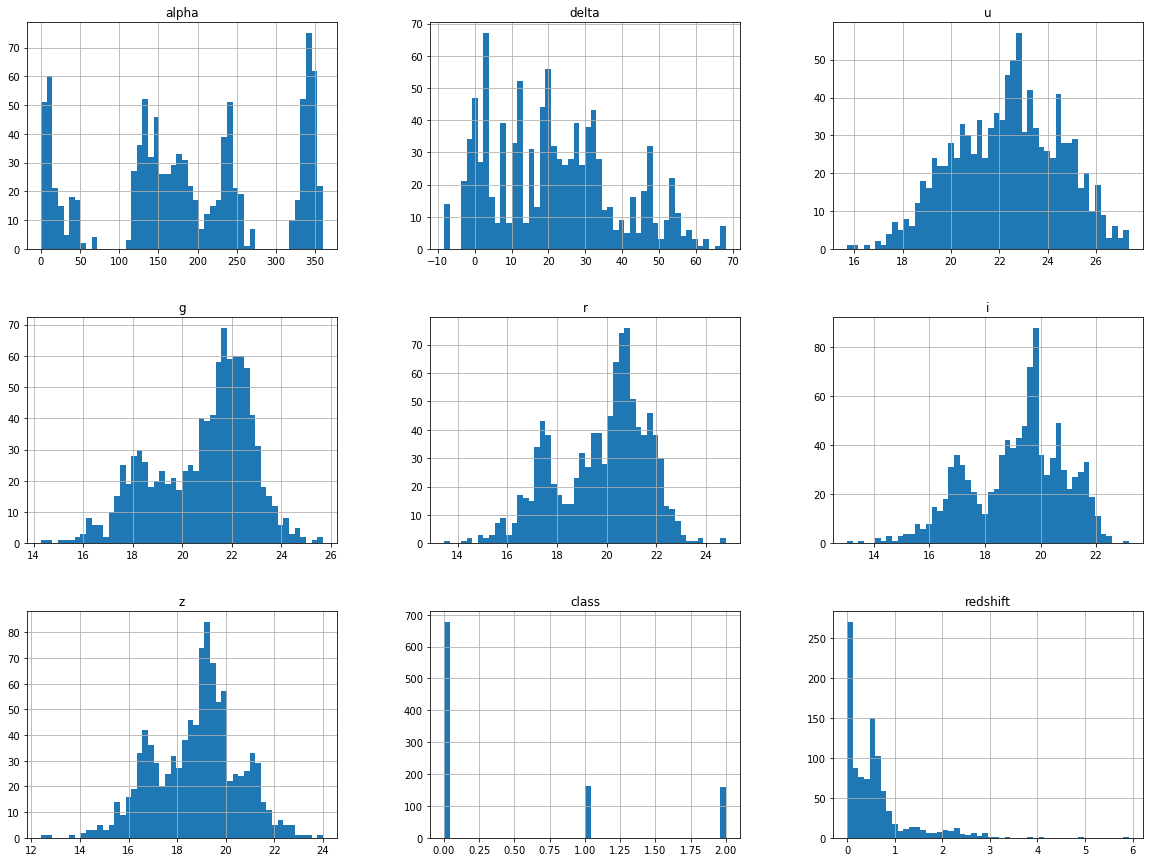

In [75]:
new_stellar_data.hist(bins=50, figsize=(20, 15))

# Splitting the data into training and testing data

In [76]:
X_train, X_test, y_train, y_test = train_test_split(new_stellar_data[['alpha','delta','u','g','r','i','z','redshift']], new_stellar_data['class'],test_size=0.25,
                                                                      random_state=42,stratify=new_stellar_data['class'])

In [99]:
print(X_train,y_train)
print(X_test,y_train)

[[-0.10761397 -0.84386352  0.18220793 ...  0.61512818  0.42131513
  -0.6492132 ]
 [ 0.26050372  0.59476812  0.07709776 ...  0.31180137  0.18856939
  -0.78827229]
 [ 0.09785128 -0.59120677 -0.18016671 ... -0.20173376 -0.2473165
  -0.95707875]
 ...
 [ 0.03646033 -0.58214257 -0.63211011 ... -0.58715773 -0.57407005
  -0.97660111]
 [-0.88465087 -0.96276653  0.14851489 ...  0.33101035  0.16162573
  -0.82419978]
 [-0.94299007 -0.24789701 -0.28662056 ... -0.2836278  -0.32991233
  -0.95003208]] [1 0 0 0 1 1 2 2 0 0 0 2 1 0 0 0 0 0 2 0 0 0 0 0 0 0 1 0 2 0 2 0 0 0 0 1 0
 1 0 0 0 0 0 2 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 2 0 0 0 0 0 0 0 0 0 2 1 2
 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 2 1 2 0 0 0 1 1 0 2 0 0 0 0 0 0 2 0 0 1 1
 1 1 1 1 1 0 0 0 2 1 0 1 2 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 2 0
 1 0 0 0 0 0 2 1 2 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 2 2 0 0 0 1 2 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 2 0 2 0 1 0 0 0 0 0 0 2 0 0 0 1 0 0 0
 0 1 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 1 0 0 0 2 0 

# Preparing the Data

In [77]:
# Normalization -  changing the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.
# changing the shape
std_scale = StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

In [78]:
# Scale -  technique to standardize the independent features present in the data in a fixed range
# changing the range
samples = np.append(X_train, X_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
X_train = minmax_scale.transform(X_train)
X_test = minmax_scale.transform(X_test)

In [79]:
# Select
train_size = 80000
y_train = y_train[:train_size].to_numpy(copy="True")
test_size = 20000
X_test = X_test[:test_size]
y_test = y_test[:test_size].to_numpy(copy="True")

# Quantum Machine Learning

#### The classical data is encoded into a quantum state space using a feature map.
We are using a ZZFeatureMap here : https://qiskit.org/documentation/stubs/qiskit.circuit.library.ZZFeatureMap.html

In [80]:
zz_map = ZZFeatureMap(feature_dimension=8, reps=2, entanglement='linear', insert_barriers=True)
zz_kernel = QuantumKernel(feature_map=zz_map, quantum_instance=Aer.get_backend('statevector_simulator'))

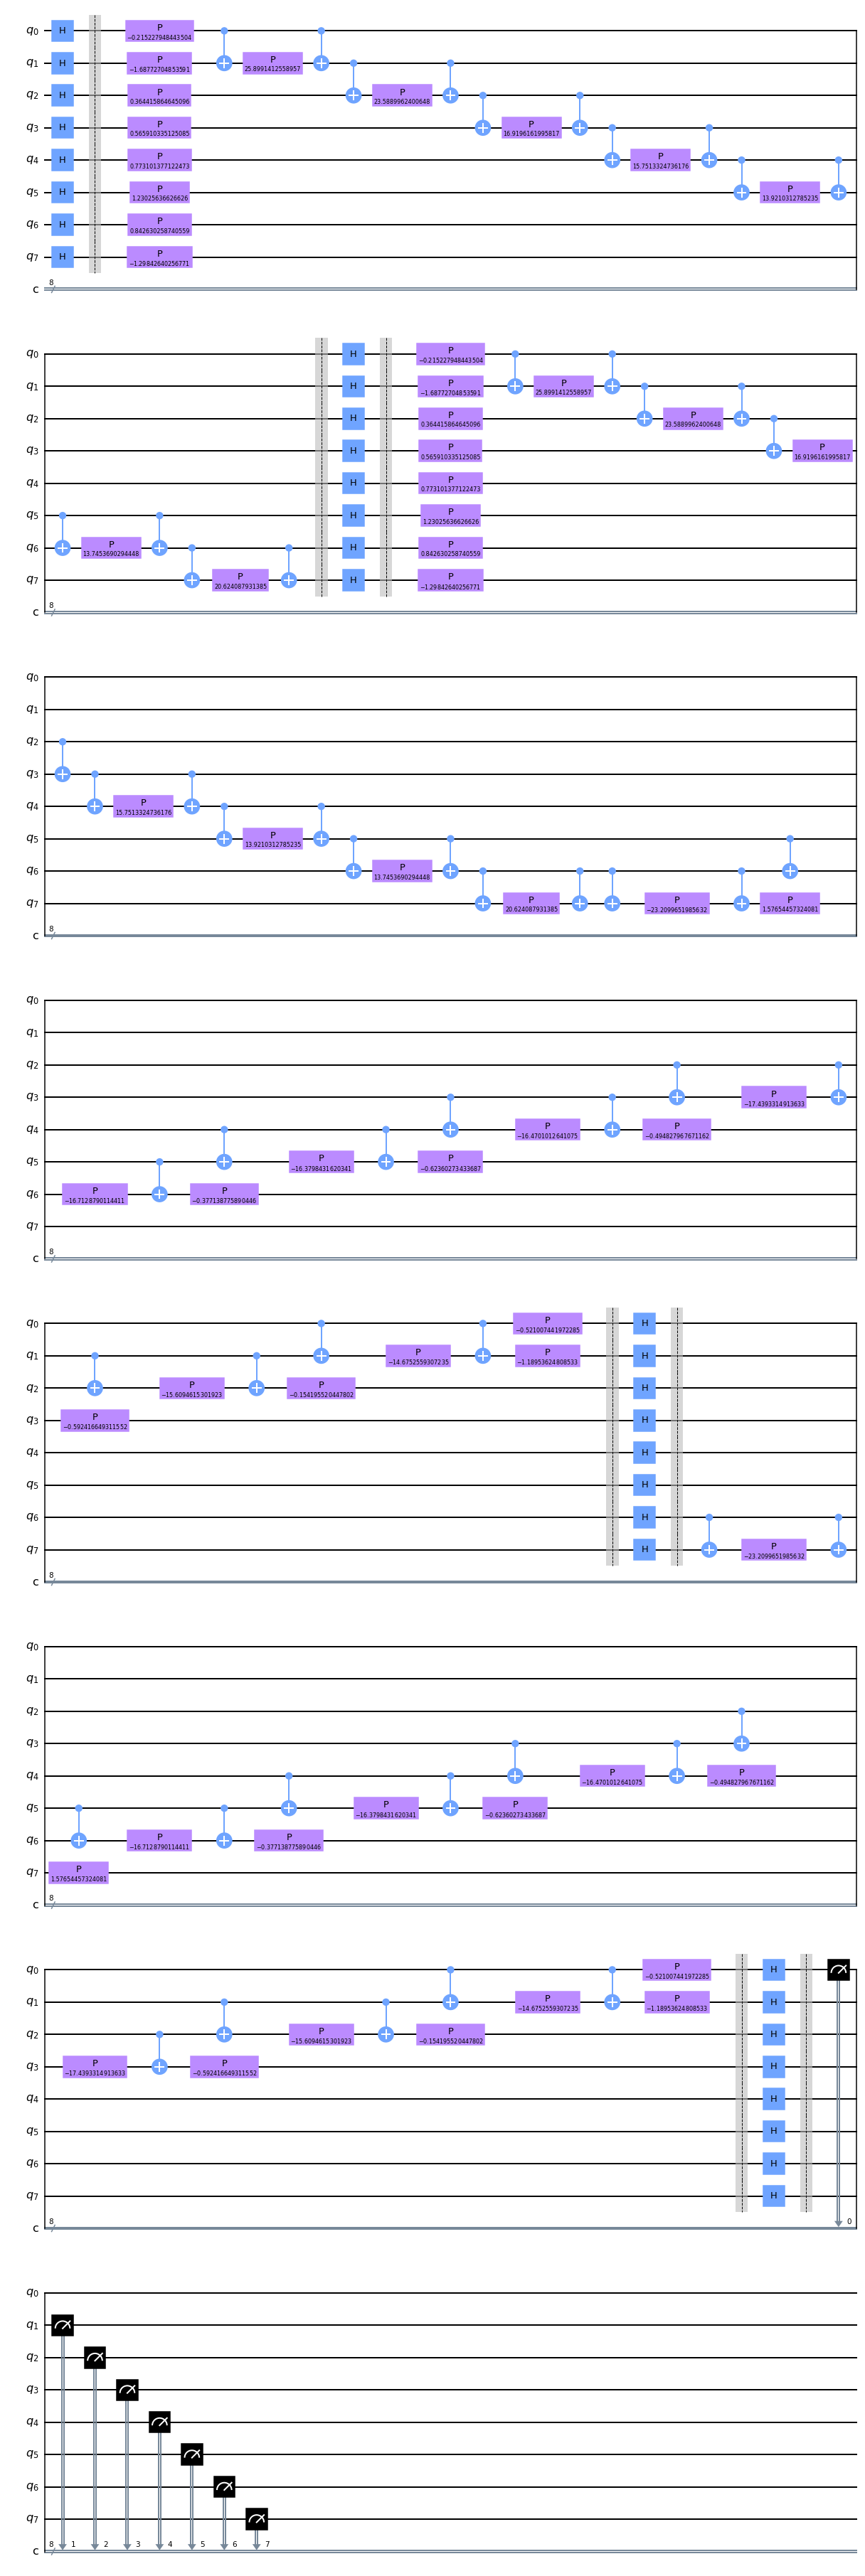

In [101]:
zz_circuit = zz_kernel.construct_circuit(X_train[0],X_train[1])
zz_circuit.decompose().decompose().draw(output='mpl')


## Simulating the circuit by defining the backend

In [82]:
backend = Aer.get_backend('qasm_simulator')
job = execute(zz_circuit, backend, shots=8129, 
              seed_simulator=1024, seed_transpiler=1024)
counts = job.result().get_counts(zz_circuit)

## Plotting the training and testing matrices

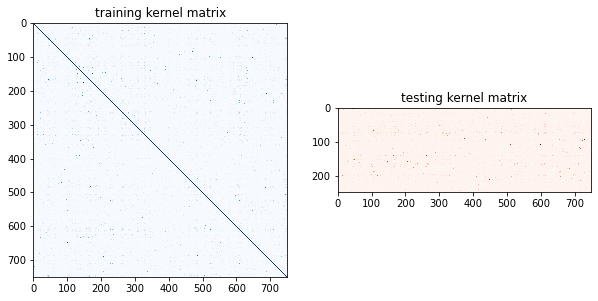

In [84]:
matrix_train = zz_kernel.evaluate(x_vec=X_train)
matrix_test = zz_kernel.evaluate(x_vec=X_test, y_vec=X_train)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(np.asmatrix(matrix_train),
              interpolation='nearest', origin='upper', cmap='Blues')
axs[0].set_title("training kernel matrix")
axs[1].imshow(np.asmatrix(matrix_test),
              interpolation='nearest', origin='upper', cmap='Reds')
axs[1].set_title("testing kernel matrix")
plt.show()

## Quantum SVM Score

In [87]:
classical_kernels = ['linear'] #Linear kernel

for kernel in classical_kernels:
    zzpc_svc = SVC(kernel=kernel,C=10,gamma=100)
    zzpc_svc.fit(matrix_train, y_train)
    zzpc_score = zzpc_svc.score(matrix_test, y_test)

    print('%s kernel classification test score:  %0.2f' % (kernel, zzpc_score))

linear kernel classification test score:  0.86


## Classical SVM Score

In [89]:
classical_kernels = ['linear']
for kernel in classical_kernels:
    classical_svc = SVC(kernel=kernel,C=10,gamma=100)
    classical_svc.fit(X_train, y_train)
    classical_score = classical_svc.score(X_test, y_test)

    print('%s kernel classification test score:  %0.2f' % (kernel, classical_score))

linear kernel classification test score:  0.94


In [91]:
print(classical_svc.predict(X_test))

[0 2 1 1 0 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 2 0
 0 2 2 0 0 0 0 2 0 0 0 2 0 0 0 1 0 0 0 1 0 0 2 2 2 0 2 0 0 2 0 1 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 1 1 0 0 0 0 0 2 1 0 2 0 0 0
 1 1 0 2 0 1 0 0 2 1 0 0 0 0 1 0 0 2 0 1 1 2 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0
 1 2 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 1 0 0
 0 2 0 0 0 1 0 0 0 2 1 0 1 0 1 2 0 0 2 0 2 2 0 0 0 0 0 0 0 1 2 0 1 0 0 0 2
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 2 0 1 0 0 0 0 0 0 0]


In [92]:
print(zzpc_svc.predict(matrix_test))

[0 2 1 1 0 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0
 0 0 2 0 1 0 0 0 1 0 0 2 0 0 0 1 0 0 0 1 0 0 0 2 0 0 1 0 0 2 0 1 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 2 1 0 2 0 0 0
 1 1 0 2 0 1 0 0 2 1 0 0 0 0 2 0 0 0 0 2 1 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 1 0 0
 0 1 0 0 0 1 0 0 0 0 1 0 1 0 2 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2
 0 0 0 0 0 1 0 1 0 0 1 0 0 2 0 0 0 0 0 0 1 0 0 0 0 1 0 0]
